In [2]:
import pandas as pd 

import seaborn as sns

import numpy as np 

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

from scipy import stats 
from scipy.stats import norm    

from sklearn import preprocessing, metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [3]:
dataFrame = pd.read_csv('KS_train_data.csv')

In [4]:
print(dataFrame.columns)

Index(['project_id', 'backers_count', 'blurb', 'category',
       'converted_pledged_amount', 'country', 'created_at', 'currency',
       'deadline', 'fx_rate', 'goal', 'launched_at', 'name', 'pledged',
       'staff_pick', 'usd_pledged', 'location', 'funded', 'subcategory',
       'project_url', 'reward_url'],
      dtype='object')


In [5]:
dataFrame.head(10)

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,...,launched_at,name,pledged,staff_pick,usd_pledged,location,funded,subcategory,project_url,reward_url
0,KS_000000,80,I will be an artist-in-residence at Elsewhere ...,art,3596,US,1325980505,USD,1334866560,1.0,...,1332969260,Elsewhere Studios artist-in-residency program!,3596.00,False,3596.00,"Paonia, CO",True,mixed media,https://www.kickstarter.com/projects/hilaryeme...,https://www.kickstarter.com/projects/hilaryeme...
1,KS_000001,82,1000 Artists is a public art-making installati...,art,4586,US,1330926084,USD,1336440145,1.0,...,1332984145,1000 Artists: Presidential Inauguration 2013,4586.00,False,4586.00,"Washington, DC",True,public art,https://www.kickstarter.com/projects/17146650/...,https://www.kickstarter.com/projects/17146650/...
2,KS_000002,21,"The Sequel to ‘My Favorite Machine”, ""MyPhoneH...",art,5217,US,1332382894,USD,1338175739,1.0,...,1332991739,MyPhoneHenge,5217.00,False,5217.00,"Frisco, TX",True,sculpture,https://www.kickstarter.com/projects/belveal/m...,https://www.kickstarter.com/projects/belveal/m...
3,KS_000003,37,A film exploring the role and value of art edu...,art,7160,GB,1332342451,USD,1334806096,1.0,...,1332991696,Walk-Through,7160.00,False,7160.00,"Glasgow, UK",True,art,https://www.kickstarter.com/projects/107813091...,https://www.kickstarter.com/projects/107813091...
4,KS_000004,153,We need to build a kitchen for Habitable Space...,art,15445,US,1328562617,USD,1335584240,1.0,...,1332992240,A kitchen for Habitable Spaces,15445.00,False,15445.00,"Kingsbury, TX",True,public art,https://www.kickstarter.com/projects/104409276...,https://www.kickstarter.com/projects/104409276...
5,KS_000005,18,Source Material is 2 person exhibition of the ...,art,2190,US,1331239703,USD,1336090320,1.0,...,1333017856,Source Material: Works by Brian Dupont and Chr...,2190.00,False,2190.00,"Houston, TX",True,painting,https://www.kickstarter.com/projects/973860748...,https://www.kickstarter.com/projects/973860748...
6,KS_000006,156,An anthropological field study of the Dwarven ...,art,5429,US,1332802530,USD,1334030340,1.0,...,1333045464,A Book of Dwarves,5429.95,False,5429.95,"Chicago, IL",True,art,https://www.kickstarter.com/projects/136757708...,https://www.kickstarter.com/projects/136757708...
7,KS_000007,479,Portrait artist seeks funds to kickstart an ex...,art,62736,US,1331325438,USD,1335671940,1.0,...,1332822807,Drawing a Drawing 365,62736.01,True,62736.01,"New Britain, CT",True,painting,https://www.kickstarter.com/projects/michaelsh...,https://www.kickstarter.com/projects/michaelsh...
8,KS_000008,41,This is a month long Residency at the The Verm...,art,2930,US,1331904129,USD,1336736610,1.0,...,1332848610,The Vermont Studio Center Artist Residency Pro...,2930.00,True,2930.00,"Johnson, VT",True,painting,https://www.kickstarter.com/projects/106325273...,https://www.kickstarter.com/projects/106325273...
9,KS_000009,25,"Art, Music, and Theater live on the Waterfront...",art,5001,US,1330979179,USD,1335443088,1.0,...,1332851088,Arts on the Waterfront,5001.00,False,5001.00,"Seattle, WA",True,public art,https://www.kickstarter.com/projects/139851890...,https://www.kickstarter.com/projects/139851890...


***
```
COL's VARS:

1)project_id
2)backers_count : number of supporters of the project (quantitative)
3)blurb : description of the project (qualitative)
4)category (qualitative)
5)converted_pledged_amount : funding amount ?? (quantitative). It's into integers
6)country (qualitative)
7)created_at (quantitative)
8)currency (qualitative)
9)deadline (quanatitative)
10)fx_rate : exchange rate (quantitative)
11)goal : goal of expected fundings (quantitative)
12)launched_at: (quantitative)
13)name : name of the project (qualitative)
14)pledged : funding amount ?? (quantitative). It's into floats (.00)
15)staff_pick : projects picked or not picked (Boolean -> True/False)
16)usd_pledged : funding amount in dollars ?? (quantitative). It's into floats (.00) != pledged
17)location: City, State(abbreviation)/Country 
18)funded : projects funded or not funded (Boolean -> True/False) --> MOST IMPORTANT
19)subcategory (qualitative)
20)project_url (link)
21)reward_url (link)

```
***

In [6]:
dataFrame['funded'].describe()

count     100000
unique         2
top         True
freq       58454
Name: funded, dtype: object

***
```
Most projects have been funded (58454) compared to (41546) not funded

```
***

***
```

List of COL's VARS which might not be relevant:

3)blurb 
20)project_url
21)reward_url 
16)usd_pledged 

```
***

***
```

Check if the dataFrame.usd_pledged != dataFrame.pledged or equal to be eliminated --> they are different 

```
***

In [7]:
gains = dataFrame[dataFrame.usd_pledged != dataFrame.pledged]
print(gains)

      project_id  backers_count  \
997    KS_000997              4   
998    KS_000998              1   
1005   KS_001005              4   
1012   KS_001012              5   
1022   KS_001022              1   
...          ...            ...   
99976  KS_099976            187   
99981  KS_099981             97   
99984  KS_099984            128   
99990  KS_099990             59   
99999  KS_099999            145   

                                                   blurb category  \
997    "SPLASH OUT THE SOUND PROJECT"! We makes ceram...      art   
998    Tell me about your taste and i will create a p...      art   
1005   Series of artistic pieces in ceramics, inspire...      art   
1012   A gorgeously illustrated, vintage inspired cal...      art   
1022   we are creating a ceramics studio within our s...      art   
...                                                  ...      ...   
99976  Love comedy? Get involved in creating a dedica...  theater   
99981  We're an affordable 

***
```

We are going to eliminate these 3 variables as they are not usefull for the analysis 
3)blurb 
20)project_url
21)reward_url 


```
***

In [8]:
dataFrame = dataFrame.drop(columns=['project_url', 'reward_url'])

In [9]:
duplicateRows = dataFrame[dataFrame.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [project_id, backers_count, blurb, category, converted_pledged_amount, country, created_at, currency, deadline, fx_rate, goal, launched_at, name, pledged, staff_pick, usd_pledged, location, funded, subcategory]
Index: []


There are no duplicate rows.

In [10]:
(dataFrame.isnull()).sum()

project_id                  0
backers_count               0
blurb                       2
category                    0
converted_pledged_amount    0
country                     3
created_at                  0
currency                    0
deadline                    0
fx_rate                     0
goal                        0
launched_at                 0
name                        1
pledged                     0
staff_pick                  0
usd_pledged                 0
location                    0
funded                      0
subcategory                 0
dtype: int64

In [11]:
dataFrame = dataFrame.dropna(how='any',axis=0)

In [12]:
(dataFrame.isnull()).sum()

project_id                  0
backers_count               0
blurb                       0
category                    0
converted_pledged_amount    0
country                     0
created_at                  0
currency                    0
deadline                    0
fx_rate                     0
goal                        0
launched_at                 0
name                        0
pledged                     0
staff_pick                  0
usd_pledged                 0
location                    0
funded                      0
subcategory                 0
dtype: int64

We removed all the rows with null v alues

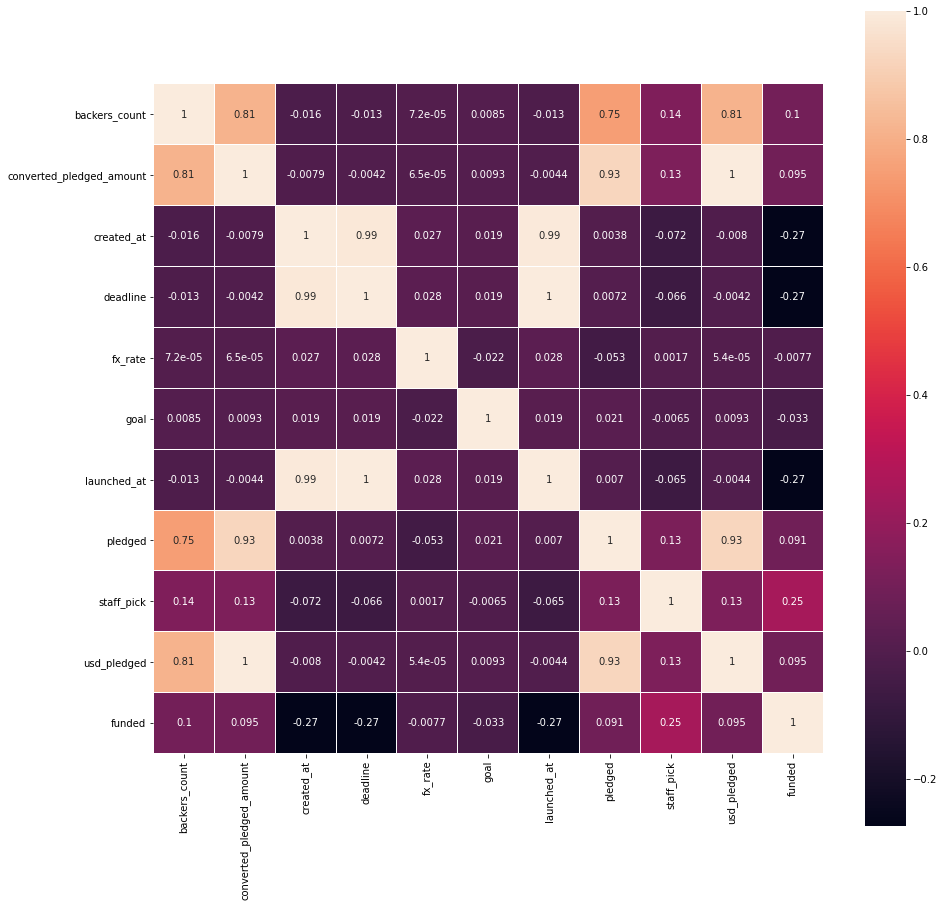

In [13]:
corrmat = dataFrame.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corrmat, square= True, annot = True, linewidths=.1, ax=ax)

The 10 features which most strongly correlate with <i>funded</i>

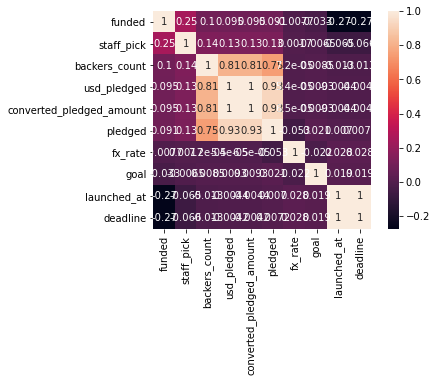

In [14]:
corrmat = dataFrame.corr()
cols = corrmat.nlargest(10, 'funded').index
sns.heatmap(corrmat.loc[cols, cols], square= True, annot = True)

The variable which correlates the most with funded is staff_pick. It is followed by backers_count and all the money-rellated variables. The least correlated ones are the time-frame-related ones, like launched_at and deadline

Check if all the values of the most relevant columns are consistent with each other

In [15]:
np.issubdtype(dataFrame['usd_pledged'].dtype, np.number)

True

In [16]:
np.issubdtype(dataFrame['backers_count'].dtype, np.number)

True

In [17]:
np.issubdtype(dataFrame['staff_pick'].dtype, np.bool)

True

In [18]:
np.issubdtype(dataFrame['funded'].dtype, np.bool)

True

There are no typos

In [19]:
dataFrame.converted_pledged_amount.describe()

count    9.999500e+04
mean     1.241154e+04
std      1.005570e+05
min      0.000000e+00
25%      1.250000e+02
50%      1.650000e+03
75%      6.271500e+03
max      1.026684e+07
Name: converted_pledged_amount, dtype: float64

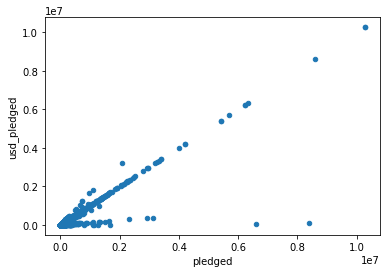

In [20]:
ax = dataFrame.plot.scatter(x = "pledged", y = "usd_pledged")

Boxplot represantion of the funded amount for each category

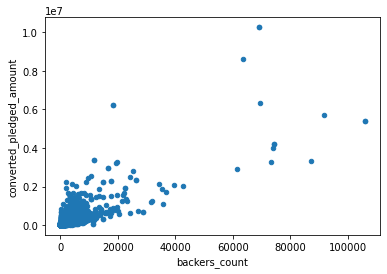

In [21]:
ax = dataFrame.plot.scatter(x = "backers_count", y = "converted_pledged_amount")

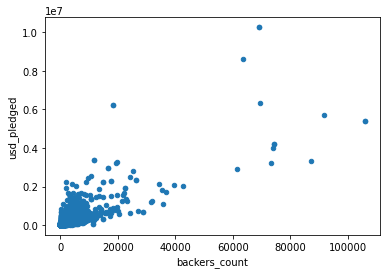

In [22]:
ax = dataFrame.plot.scatter(x = "backers_count", y = "usd_pledged")

We used this call to see the number of total projects that are left after data cleaning

Boxplot that represents the funded amount for each category

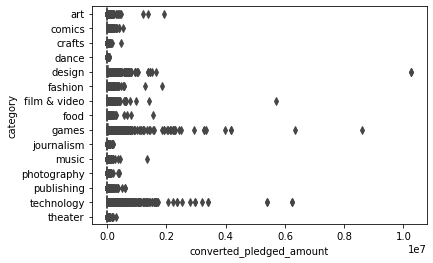

In [23]:
usd_pledged = dataFrame['converted_pledged_amount']
category = dataFrame['category']
sns.boxplot(x=usd_pledged, y=category)

Check the funded amount for each category

This boxplot is used in order to see the values that are above the upper bound of the currency column

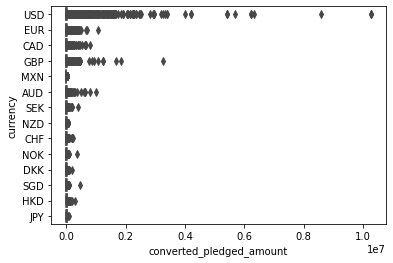

In [24]:
sns.boxplot(x=dataFrame.converted_pledged_amount, y = dataFrame.currency)

Derive a new column called funded_amount_per_backer as the first additional feature, and check if it was funded, if thats the case divide them, else assign 0.

In [25]:
dataFrame['funded_amount_per_backer'] = np.where(dataFrame['funded'] == True , 
                                                 dataFrame.converted_pledged_amount / dataFrame.backers_count,
                                                0)
dataFrame.funded_amount_per_backer = dataFrame.funded_amount_per_backer.round(2)
dataFrame.head(3)

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,goal,launched_at,name,pledged,staff_pick,usd_pledged,location,funded,subcategory,funded_amount_per_backer
0,KS_000000,80,I will be an artist-in-residence at Elsewhere ...,art,3596,US,1325980505,USD,1334866560,1.0,2800.0,1332969260,Elsewhere Studios artist-in-residency program!,3596.0,False,3596.0,"Paonia, CO",True,mixed media,44.95
1,KS_000001,82,1000 Artists is a public art-making installati...,art,4586,US,1330926084,USD,1336440145,1.0,4500.0,1332984145,1000 Artists: Presidential Inauguration 2013,4586.0,False,4586.0,"Washington, DC",True,public art,55.93
2,KS_000002,21,"The Sequel to ‘My Favorite Machine”, ""MyPhoneH...",art,5217,US,1332382894,USD,1338175739,1.0,5000.0,1332991739,MyPhoneHenge,5217.0,False,5217.0,"Frisco, TX",True,sculpture,248.43


Addition of the second feature named project_time which represents the duration of the project since its creation until its deadline.

In [26]:
dataFrame['project_time'] = [ row.deadline - row.created_at for index, row in dataFrame.iterrows() ]
dataFrame['create_to_launch_time'] = [ row.launched_at - row.created_at for index, row in dataFrame.iterrows() ]
dataFrame['launch_to_deadline_time'] = [ row.deadline - row.launched_at for index, row in dataFrame.iterrows() ]

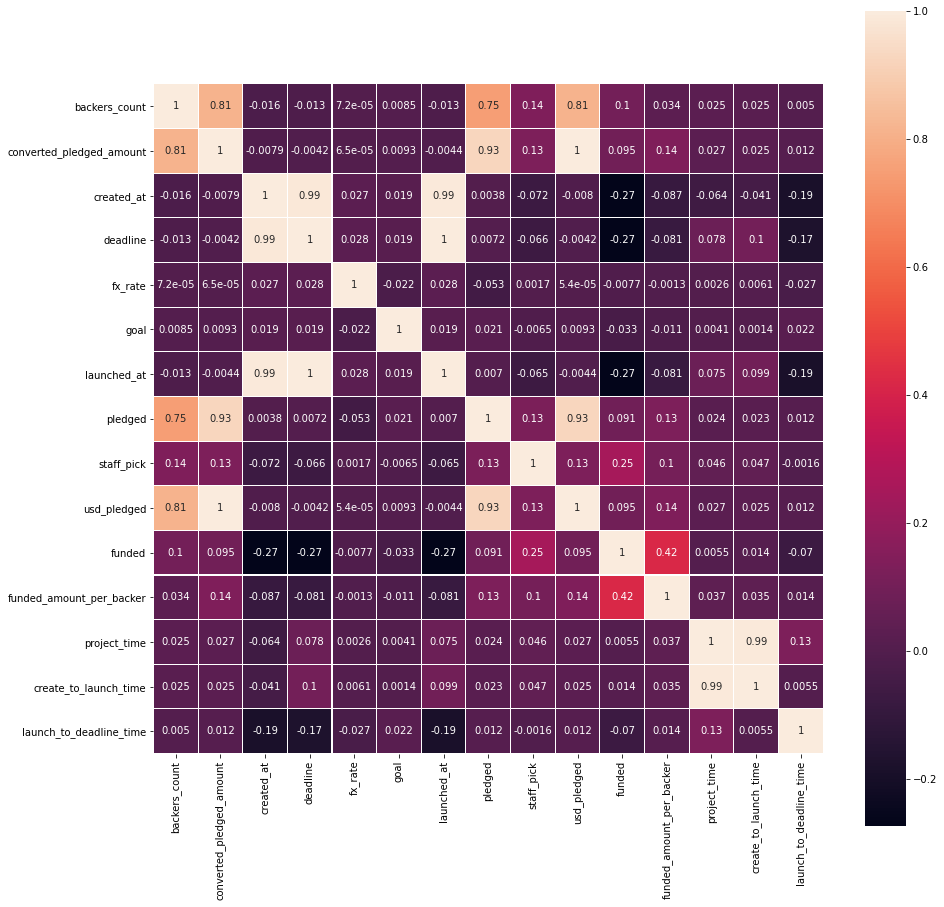

In [27]:
dataFrame.head(3)

corrmat = dataFrame.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corrmat, square= True, annot = True, linewidths=.1, ax=ax)

Reminder : Normalize the data with log-transformation before modelling !!!

((array([-4.34601058, -4.14723433, -4.03911836, ...,  4.03911836,
          4.14723433,  4.34601058]),
  array([1.e-02, 1.e+00, 1.e+00, ..., 1.e+08, 1.e+08, 1.e+08])),
 (124555.63922410482, 44476.7193289665, 0.09915957783698112))

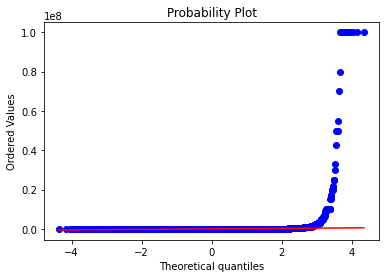

In [28]:
stats.probplot(dataFrame["goal"],plot=plt)

In [29]:
dataFrame['goal_usd'] = dataFrame.goal * dataFrame.fx_rate
dataFrame['log_goal'] = np.log(dataFrame['goal_usd'])
dataFrame['log_project_time'] = np.log(dataFrame['project_time'])

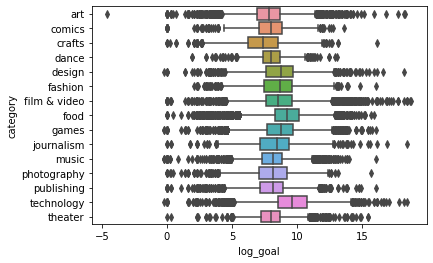

In [30]:
sns.boxplot(x=dataFrame.log_goal, y=dataFrame.category)

In [31]:
dff = dataFrame[dataFrame.category == "art"]
dff.project_id.describe()

count         10344
unique        10344
top       KS_008662
freq              1
Name: project_id, dtype: object

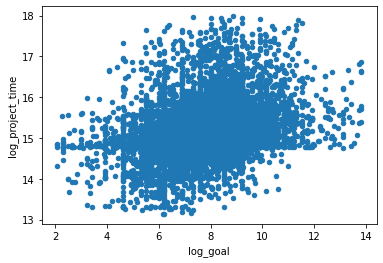

In [32]:
dff = dff[dff.log_goal > 2]
dff = dff[dff.log_goal < 14]
dff = dff[dff.log_project_time > 13]
dff = dff[dff.log_project_time < 18]
dff.plot.scatter(x = "log_goal", y = "log_project_time")

In [33]:
dff.project_id.describe()

count         10236
unique        10236
top       KS_008662
freq              1
Name: project_id, dtype: object

In [34]:
dfTech = dataFrame[dataFrame.category == "technology"]
dfTech.project_id.describe()

count         10456
unique        10456
top       KS_091352
freq              1
Name: project_id, dtype: object

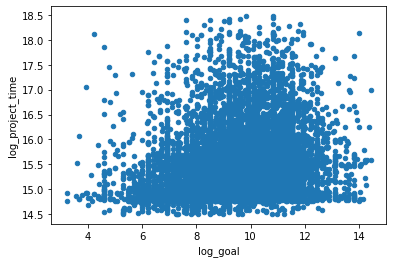

In [35]:
dfTech = dfTech[dfTech.log_goal < 14.5]
dfTech = dfTech[dfTech.log_goal > 3]
dfTech = dfTech[dfTech.log_project_time > 14.5]
dfTech = dfTech[dfTech.log_project_time < 18.5]
dfTech.plot.scatter(x = "log_goal", y = "log_project_time")

In [36]:
dfTech.project_id.describe()

count         10102
unique        10102
top       KS_091352
freq              1
Name: project_id, dtype: object

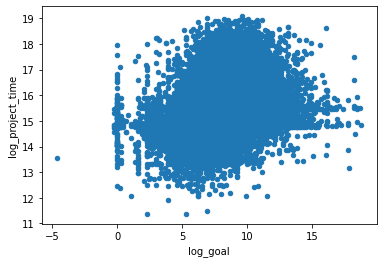

In [37]:
dataFrame.plot.scatter(x = "log_goal", y = "log_project_time")

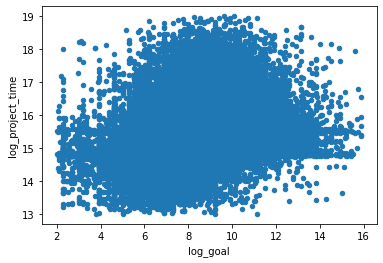

In [570]:
dataFrame = dataFrame[dataFrame.log_goal > 2]
dataFrame = dataFrame[dataFrame.log_goal < 16]
dataFrame = dataFrame[dataFrame.log_project_time > 13]
dataFrame = dataFrame[dataFrame.log_project_time < 19]

dataFrame.plot.scatter(x = "log_goal", y = "log_project_time")

Random Forest

In [41]:
le = LabelEncoder()
# Creating numeric versions of categorical columns
dataFrame['category_no'] = le.fit_transform(dataFrame['category'])
dataFrame['subcategory_no'] = le.fit_transform(dataFrame['subcategory'])
dataFrame['country_no'] = le.fit_transform(dataFrame['country'])

from sklearn.ensemble import RandomForestClassifier

X =dataFrame[['goal_usd', 'created_at', 'deadline', 'category_no', 'subcategory_no', 'staff_pick','country_no']]  # Known features
y = dataFrame['funded']  # To be predicted

# Split the dataset into a training- and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=None,
    min_samples_split=2, random_state=0)

# Train the model with the training features
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

# Correctness of the classifier (slightly different everytime)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Log-loss:", metrics.log_loss(y_test, y_pred))
dataFrame['FundedPre'] = clf.predict_proba(X)

ValueError: could not convert string to float: 'Design your own totally unique & stunning neon light or sign - simply choose colours & fonts online or upload artwork!'

In [611]:
dataFrame['predictedFunded'] = np.where(dataFrame['FundedPre'] < 0.5, True, False)

In [613]:
dataFrame['predicted_correctly'] = np.where(dataFrame['predictedFunded'] == dataFrame['funded'], True, False)
dataFrame.predicted_correctly.describe()

count     99643
unique        2
top        True
freq      95709
Name: predicted_correctly, dtype: object

Neural Network Model

In [ ]:
# model = Sequential()
# model.add(Dense(1, input_shape=(3,)))

# model.compile(Adam(lr=i), 'mean_squared_error')

# history = model.fit(x_train, y_train, epochs = 500, validation_split = 0.1, verbose = 0)
# history_dict = history.history


Training data set addition of new columns 

In [ ]:
dataFrameTest = pd.read_csv('KS_test_data.csv', delimiter=';')
#dfTest = pd.DataFrame(dataFrameTest)
le = LabelEncoder()

dataFrameTest['category_no'] = le.fit_transform(dataFrameTest['category'])
dataFrameTest['subcategory_no'] = le.fit_transform(dataFrameTest['subcategory'])
#dfTest['country_no'] = le.fit_transform(dfTest['country'])
dataFrameTest['project_time'] = [ row.deadline - row.created_at for index, row in dataFrameTest.iterrows() ]
dataFrameTest['log_goal'] = np.log(dataFrameTest.goal)


In [ ]:
dataFrameTest.head(10)

Predictions are as follows: 99 False, 77966 True #VERY WEIRD PREDICTIONS

In [ ]:
x=dataFrameTest[['goal', 'category_no', 'subcategory_no', 'staff_pick', 'project_time']]  # Known features
dataFrameTest['funded'] = clf.predict(x)
dataFrameTest.funded.describe()

<!-- We maybe removed too much data as now the countis 73906 out of 100K -->